<div style="background-color: #00008B; padding: 20px;">
    <h1 style="font-size: 100px; color: #ffffff;">Convolutional Neural Network (CIFAR-10)</h1>
</div>

<div style="background-color:#f0f8ff; padding: 20px; border: 2px solid #4682b4; border-radius: 10px;">

### &#128279; <span style="color:#4682b4;">CIFAR-10 Dataset</span>

**CIFAR-10** is a popular dataset used for training machine learning and computer vision algorithms. It consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 test images. The classes include common objects such as airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

**Differences between CIFAR-10 and MNIST**:
- **Image Type**: CIFAR-10 contains color images, whereas MNIST contains grayscale images of handwritten digits.
- **Image Size**: CIFAR-10 images are 32x32 pixels, while MNIST images are 28x28 pixels.
- **Number of Classes**: CIFAR-10 has 10 classes of objects, compared to the 10 digit classes in MNIST.

We are going to develop a **Convolutional Neural Network (CNN) classifier** to predict the classes of images in the CIFAR-10 dataset. This will involve building and training a CNN model that can accurately classify the images into their respective categories.

For more information, please visit the [CIFAR-10 dataset page](https://www.cs.toronto.edu/~kriz/cifar.html).

</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class GeneralCNN(nn.Module):
    def __init__(self, input_channels, num_classes, conv1_out_channels, conv2_out_channels, fc1_out_features, fc2_out_features, dropout_prob=0.5):
        super(GeneralCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(input_channels, conv1_out_channels, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(conv1_out_channels, conv2_out_channels, kernel_size=3, padding=1)
        
        self.fc1 = nn.Linear(conv2_out_channels * 8 * 8, fc1_out_features)
        self.bn1 = nn.BatchNorm1d(fc1_out_features)
        self.dropout1 = nn.Dropout(p=dropout_prob)
        
        self.fc2 = nn.Linear(fc1_out_features, fc2_out_features)
        self.bn2 = nn.BatchNorm1d(fc2_out_features)
        self.dropout2 = nn.Dropout(p=dropout_prob)
        
        self.output_layer = nn.Linear(fc2_out_features, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.num_flat_features(x))
        
        x = F.relu(self.fc1(x))
        x = self.bn1(x)
        x = self.dropout1(x)
        
        x = F.relu(self.fc2(x))
        x = self.bn2(x)
        x = self.dropout2(x)
        
        x = self.output_layer(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features



In [5]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')
    print('Training complete.')



In [6]:
# Function to evaluate the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy on test data: {accuracy:.2f}%')

# Example usage with CIFAR-10 dataset
# Assuming train_loader and test_loader are defined

input_channels = 3  # CIFAR-10 has 3 color channels
num_classes = 10  # CIFAR-10 has 10 classes
conv1_out_channels = 32
conv2_out_channels = 64
fc1_out_features = 512
fc2_out_features = 256

model = GeneralCNN(input_channels, num_classes, conv1_out_channels, conv2_out_channels, fc1_out_features, fc2_out_features)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_model(model, train_loader, criterion, optimizer, num_epochs=10)
evaluate_model(model, test_loader)


Epoch 1/10, Loss: 2.0236
Epoch 2/10, Loss: 1.8506
Epoch 3/10, Loss: 1.8109
Epoch 4/10, Loss: 1.7360
Epoch 5/10, Loss: 1.6968
Epoch 6/10, Loss: 1.6855
Epoch 7/10, Loss: 1.6359
Epoch 8/10, Loss: 1.5707
Epoch 9/10, Loss: 1.5445
Epoch 10/10, Loss: 1.5186
Training complete.
Accuracy on test data: 57.80%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


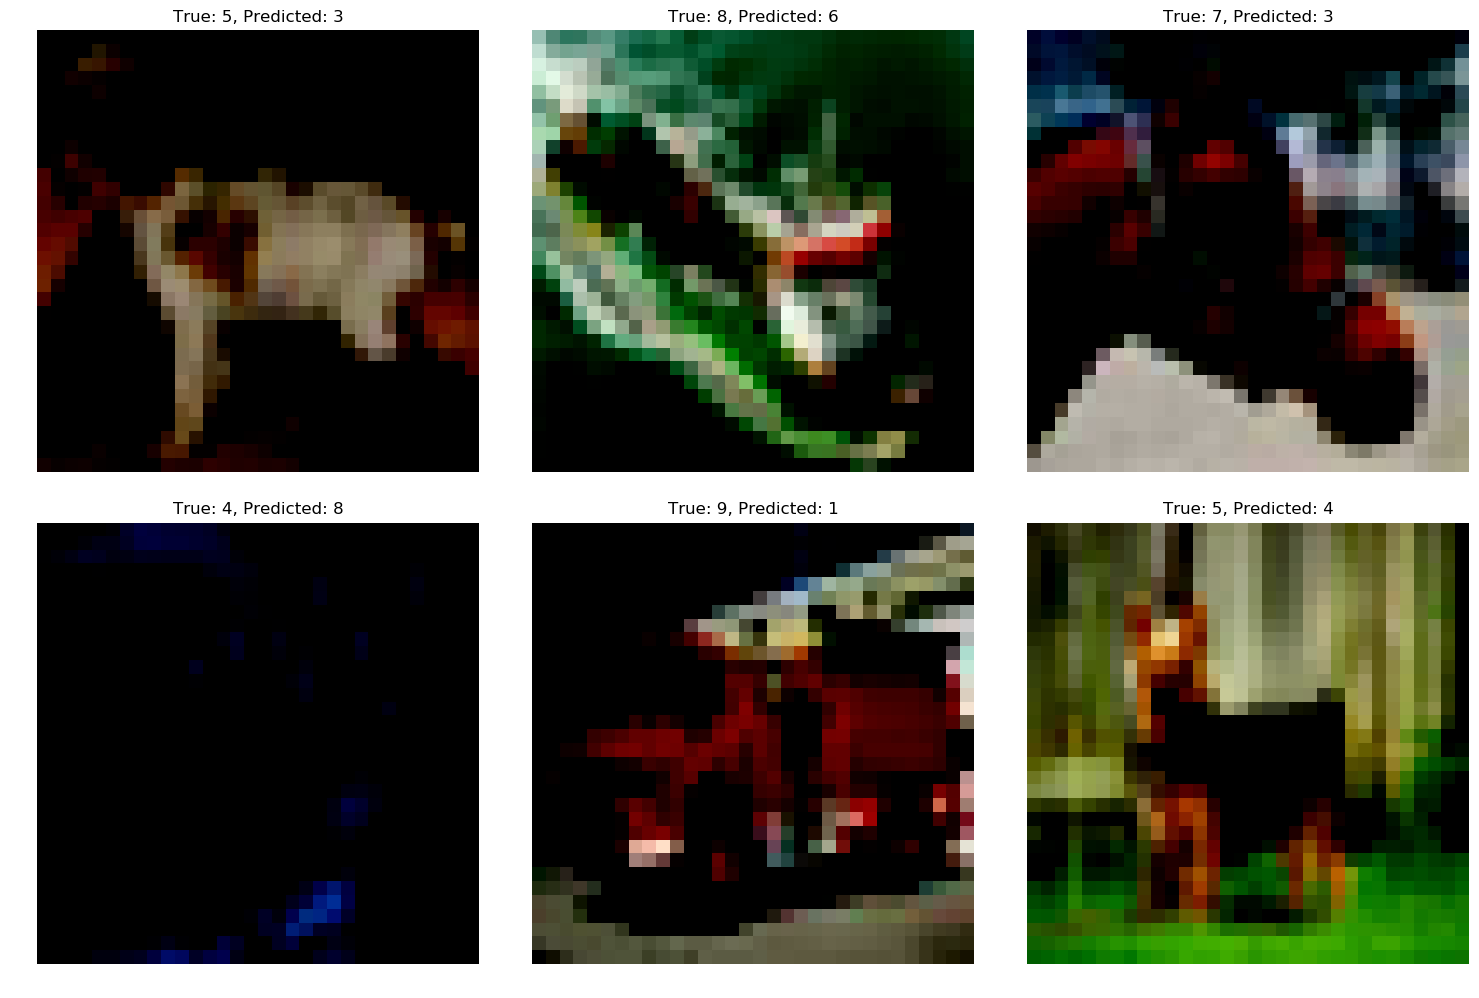

In [42]:
find_misclassified = torch.utils.data.DataLoader(testset, batch_size= 10000 ,
                                         shuffle=False, num_workers=2)

for images, labels in find_misclassified:
    images = images.view(-1, 3, 32, 32)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    break

    if predicted.item() != label.item():
        misclassified_examples.append((image.squeeze(), label.item(), predicted.item()))
        if len(misclassified_examples) == 3:
            break
            
indices = [i for i, (x, y) in enumerate(zip(  predicted  , labels)) if x != y][:6]

true_labels =[ labels[x ] for x in indices] # true labels
predicted_labels = [ predicted[x ] for x in indices]  # predicted labels
test_data_images = [np.transpose(images[x] , (1,2,0)) for x in indices ]  #  test data images

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot each misclassified row with true and predicted labels
for i, ax in enumerate(axes.flatten()):
    ax.imshow(test_data_images[i], cmap='plasma')  # Assuming grayscale images
    ax.set_title(f'True: {true_labels[i]}, Predicted: {predicted_labels[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()